# TP 1.0 - Minor Assignments 1, 2 & 3

In [1]:
%matplotlib notebook

<div class="alert alert-danger">
  <b>Minor Assignment 1/13:</b> <br/>  
Show graphically the convexity of least mean square for linear models. To do so, generate a dataset and illustrate the convexity of the error function using a 3D interactive plot as well as a corresponding 2D plot showing cuts of the function.
</div>

<IPython.core.display.Javascript object>


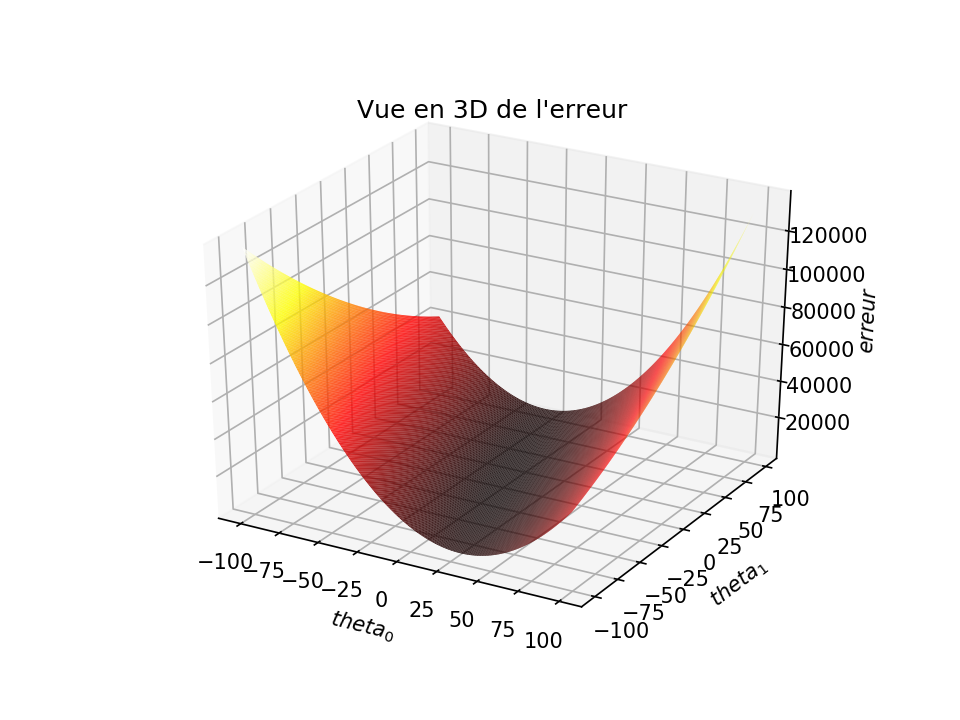

In [2]:
# ESTHER JAMET & ALEXIS CARBILLET
# Assignment 1

# importation des bibliothèques
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import random

# création des données
# ajouter des y pour les points d'entrée donc faire des couples de valeurs
m = 10  # nombre de données (m entrées et m sorties)
x = []  # liste des entrées
y = []  # liste des sorties

for i in range(m):
    xi = random.random() * 5  # valeur en entrée
    s = random.random() * 5  # valeur en sortie
    y.append(s)
    x.append(xi)

theta0 = np.arange(-100, 100)  # création de la liste des valeurs de theta0
theta1 = np.arange(-100, 100)  # création de la liste des valeurs de theta1
xx, yy = np.meshgrid(theta0, theta1)

somme = 0
erreur = np.zeros((len(theta0), len(theta1)))  # création de notre matrice d'erreur en fonction de theta0 et theta1

for j in range(len(theta0)):
    for k in range(len(theta1)):
        for i in range(m):  # pour chaque couple (theta0,theta1) on calcule notre erreur
            somme = somme + (theta0[j] + theta1[k] * x[i] - y[i]) ** 2
        erreur[j, k] = (somme / m)
        somme = 0

# illustration 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, erreur, rstride=1, cstride=1, cmap='hot')
ax.set_xlabel('$theta_0$')
ax.set_ylabel('$theta_1$')
ax.set_zlabel('$erreur$')
plt.title("Vue en 3D de l'erreur")
plt.show()


# illustration 2D
# une fonction pour chaque type de coupe
# pour theta0 fixé
def coupe_theta0(i):
    plt.plot(theta1, erreur[i, :])  # coupe à theta0=i
    plt.ylabel('erreur')
    plt.title('coupe pour theta0=', i)
    plt.show()


# pour theta0 fixé
def coupe_theta1(i):
    plt.plot(theta0, erreur[:, i])  # coupe à theta1=i
    plt.ylabel('erreur')
    plt.title('coupe pour theta0=', i)
    plt.show()


# pour différents z fixés avec un intervalle de précision 2*epsilon pour chaque z
def coupe_z(liste_z, erreur, epsilon):
    x = []
    y = []

    for k in liste_z:
        # pour chaque z, si la valeur est dans l'intervalle [z-epsilon,z+epsilon],
        # alors on garde ses coordonnées et on les stocke dans les listes x et y
        for i in range(np.shape(erreur)[0]):
            for j in range(np.shape(erreur)[1]):
                if erreur[i, j] > (k - epsilon) and erreur[i, j] < (k + epsilon):
                    x.append(i - 100)
                    y.append(j - 100)
        plt.plot(x, y, 'o', label='valeur: {}'.format(k))  # on plot nos points avec une couleur dépendante de z

        # on réinitialise les listes pour les prochains cercles
        x = []
        y = []

    plt.title('coupe selon z pour epsilon={}'.format(epsilon))
    plt.xlabel('theta0')
    plt.ylabel('theta1')
    plt.legend()
    plt.show()


L'erreur est bien convexe comme on peut le voir sur la figure.

<div class="alert alert-danger">
  <b>Minor Assignment 2/13:</b> <br/>  
Use the previous illustrations to show how an approach based on Gradient Descent converges to the global minima. Provide the same plots normalizing the data and compare them.
</div>

In [3]:
# ESTHER JAMET & ALEXIS CARBILLET
# Assignment 2

# import des bibliothèques
import numpy as np
import random

# création des données
# ajouter des y pour les points d'entrée donc faire des couples de valeurs
m = 10  # nombre de données
x = []  # liste des entrées
y = []  # liste des sorties

# on remplit nos listes
for i in range(m):
    xi = random.random() * 5  # valeur en entrée
    s = random.random() * 5  # valeur en sortie
    y.append(s)
    x.append(xi)


# fonction h dépendant du couple (theta0,theta1)
def htetha(x, theta0, theta1):  # pour une droite theta0+theta1*x
    return theta0 + theta1 * x


def d_essr(h, x, y, theta0, theta1):  # calcul de la dérivée de Essr
    e = 0  # dérivée de Essr
    for i in range(len(y)):
        e += x[i] * (y[i] - h(x[i], theta0, theta1))
    return 2 * e


def trouvemini(h, x, y, theta0, theta1, eta):
    # permet de trouver les coordonnées du point tel que le vecteur theta - eta*dEssr est minimum
    # eta est une valeur fixée arbitrairement
    theta0i = theta0
    theta1i = theta1
    a = theta0 - eta * d_essr(h, x, y, theta0i, theta1)  # calcule mini theta0
    b = theta1i - eta * d_essr(h, x, y, theta0, theta1i)  # calcule mini theta1
    while a < theta0i:  # tant que ma dérivée en fonction de theta0 décroit
        theta0i = a
        a = theta0i - eta * d_essr(h, x, y, theta0i, theta1)
    while b < theta1i:  # tant que ma dérivée en fonction de theta1 décroit
        theta1i = b
        b = theta1i - eta * d_essr(h, x, y, theta0, theta1i)
    return a, b  # renvoie le couple de valeur tel que l'erreur est minimale


print('coordonnées de l erreur minimale théorique={}'.format(trouvemini(htetha, x, y, 10, 100, 0.0001)))

# vérification
theta0 = np.arange(0, 10)  # création d'un vecteur theta0
theta1 = np.arange(0, 100)  # création d'un vecteur theta1
somme = 0
erreur = np.zeros((len(theta0), len(theta1)))  # on créé notre matrice d'erreur

for j in range(len(theta0)):
    for k in range(len(theta1)):
        for i in range(m):
            somme = somme + (theta0[j] + theta1[k] * x[i] - y[i]) ** 2
        erreur[j, k] = (somme / m)
        somme = 0

mini = (len(theta0) - 1, len(theta1) - 1)  # on intitialise le minimum avec ce couple de coordonnées

for i in range(np.shape(erreur)[0]):
    for j in range(np.shape(erreur)[1]):
        if erreur[i, j] < erreur[mini[0], mini[1]]:
            mini = (i, j)

print('coordonnées de l erreur minimale pratique={}'.format((i, j)))


coordonnées de l erreur minimale théorique=(11.462535149580695, 101.4625351495807)
coordonnées de l erreur minimale pratique=(9, 99)


On a bien une convergence vers une erreur minimale de coordonnées (11,101).
On a une différence d'environ 2 entre la théorie et la pratique pour les deux composantes de théta, sûrement dû à une mauvaise valeur de eta.

<div class="alert alert-danger">
  <b>Minor Assignment 3/13:</b> <br/>  
What are the conditions for a Gradient descent based approach to converge to the expected solution? Graphical illustrate an example of error function leading to a non-convex problem for linear models.
</div>

Pour espérer avoir une solution, il faut que la fonction soit convexe et qu'il existe une forme de solution fermée.

<IPython.core.display.Javascript object>


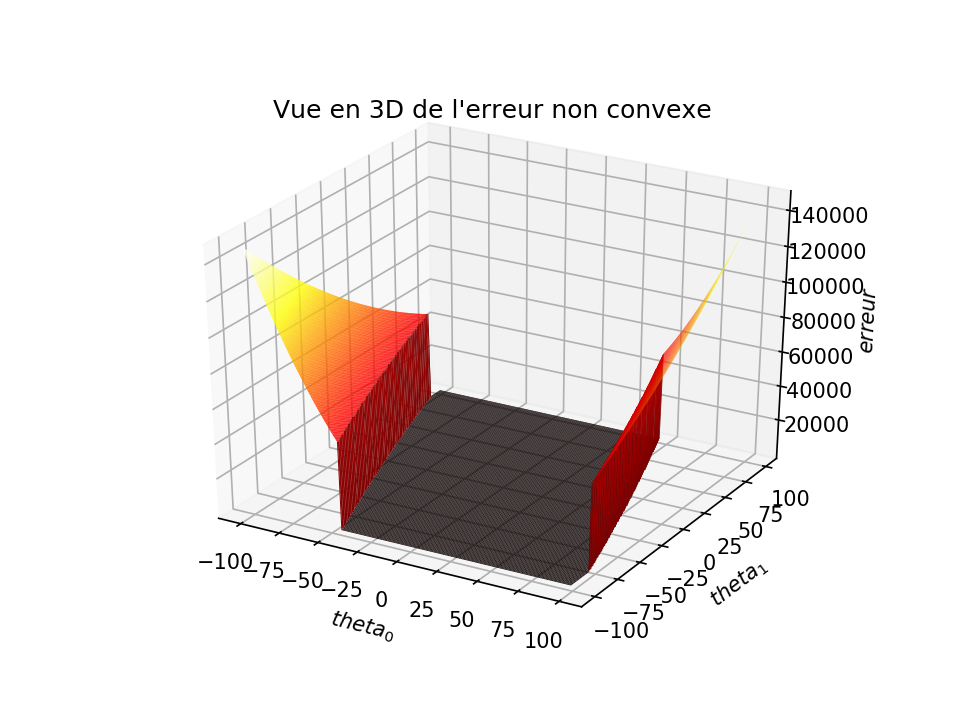

In [4]:
# ESTHER JAMET & ALEXIS CARBILLET
# Assignment 3

# import des bibliothèques
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import random

# création des données
# ajouter des y pour les points d'entrée donc faire des couples de valeurs
m = 10  # nombre de données
x = []  # liste des entrées
y = []  # liste des sorties

for i in range(m):
    xi = random.random() * 5  # valeur en entrée
    s = random.random() * 5  # valeur en sortie
    y.append(s)
    x.append(xi)

theta0 = np.arange(-100, 100)  # création d'un vecteur theta0
theta1 = np.arange(-100, 100)  # création d'un vecteur theta1
xx, yy = np.meshgrid(theta0, theta1)
somme = 0
erreur = np.zeros((len(theta0), len(theta1)))  # on crée notre matrice d'erreur

for j in range(len(theta0)):
    for k in range(len(theta1)):
        for i in range(m):
            somme = somme + (theta0[j] + theta1[k] * x[i] - y[i]) ** 2
        if (somme / m) < 50000:
            # nouveau type d'erreur non convexe, car plusieurs couples de coordonnées donnent une erreur minimale
            erreur[j, k] = 10
        else:
            erreur[j, k] = (somme / m)
        somme = 0

# illustration 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, erreur, rstride=1, cstride=1, cmap='hot')
ax.set_xlabel('$theta_0$')
ax.set_ylabel('$theta_1$')
ax.set_zlabel('$erreur$')
plt.title("Vue en 3D de l'erreur non convexe")
plt.show()


On obtient une fonction non convexe.